### Exercise 2: Logistic Regression
Implement the logistic regression in your own code. Also implement the logistic regression by using existing library (e.g. scikit-learn). Compare the performance of both implementations and show the results.
Use the following evaluation metrics: (a) Mean Squared Error (MSE) (b) Root Mean Squared Error (RMSE) (c) Mean Absolute Error (MAE) (d) R Squared (R²).

##### Manual Method

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import sklearn.metrics as mt
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report 

# Class for Logistic Regression Model
class LogisticRegress:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    # Function to define the Intercept value
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    # Sigmoid Function to Predict Y
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    # Loss Function to minimize the Error of our Model
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    # Function for Model Training
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # Weights Initialization
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            loss = self.__loss(h, y)
                
            if(self.verbose ==True and i % 100000 == 0):
                print(f'loss: {loss} \t')
    
    # Predict Probability Values based on generated W values out of all iterations
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        return self.__sigmoid(np.dot(X, self.theta))
    
    # To predict the Actual Values (0 or 1) 
    def predict(self, X):
        return self.predict_prob(X).round()
    
# Input: Dataset
iris = datasets.load_iris()
X = iris.data[:, :2]
y = (iris.target != 0) * 1

# Dividing into test and training sets 
X_train, X_test, Y_train, Y_test =  train_test_split(X,y,test_size=0.3)

# Create Logistic Regression object
model = LogisticRegress(lr=0.01, num_iter=300000)

# Train the model using the training sets
model.fit(X_train, Y_train)

# Make predictions using the testing set
preds = model.predict(X_test)

##### Logistic Regression (SciKit-Learn).

In [2]:
# Create Logistic Regression object
logreg = LogisticRegression(max_iter=300000)

# Train the model using the training sets
logreg.fit(X_train,Y_train)

# Make predictions using the testing set
Y_pred = logreg.predict(X_test)

##### Output and Comparison of Both Methods.

FOR LOGISTIC REGRESSION USING MANUAL METHOD 



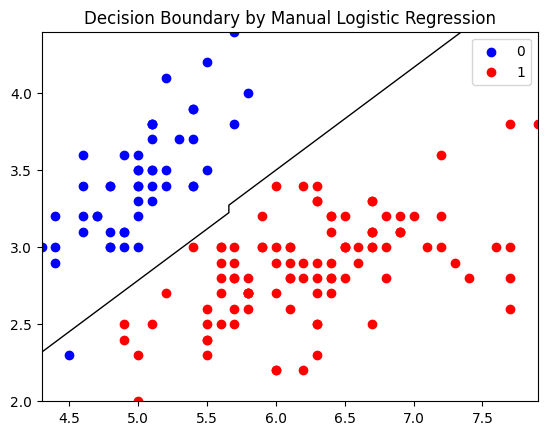


Confusion Matrix



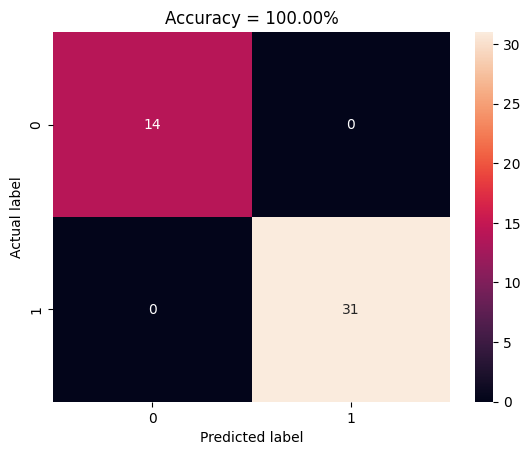



Classification Report

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        31

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

__________________________________________________________________


FOR LOGISTIC REGRESSION USING SCIKIT-LEARN METHOD 



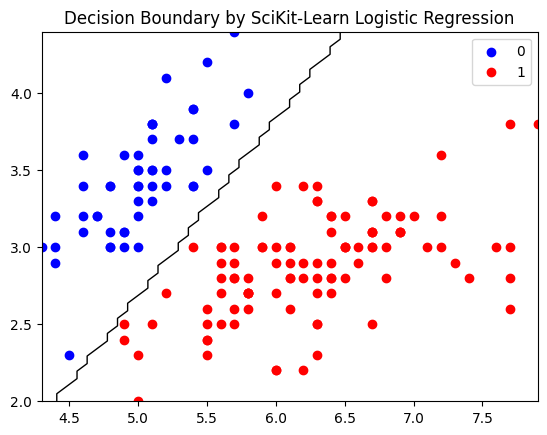


Confusion Matrix



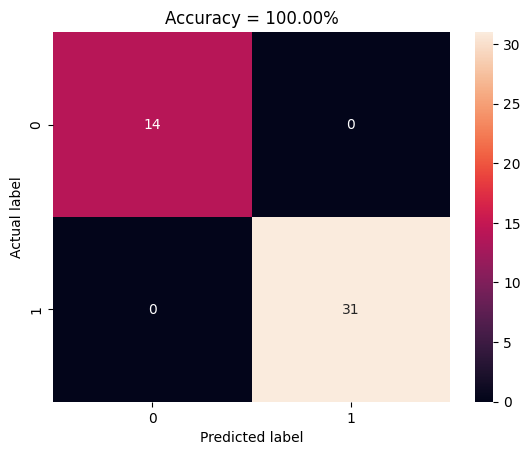


Classification Report

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        31

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [3]:
# For Manual Method
# Plotting Line and Scatter Points
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.title("Decision Boundary by Manual Logistic Regression")
plt.legend()
x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = model.predict(grid).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');

# Output: Regression Line Plot, Confusion Matrix, Accuracy & Classification Report
print("FOR LOGISTIC REGRESSION USING MANUAL METHOD \n")
plt.show()
print("\nConfusion Matrix\n")
cm = mt.confusion_matrix(Y_test, preds)
cm_df = confusion_matrix(Y_test, preds)
sns.heatmap(cm_df, annot=True)
plt.title('Accuracy = {0:.2f}%'.format(accuracy_score(Y_test, preds)*100))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()
print("\n\nClassification Report\n\n",classification_report(Y_test, preds))

# For SciKit-Learn Method
# Plotting Line and Scatter Points
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.title("Decision Boundary by SciKit-Learn Logistic Regression")
plt.legend()
x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = logreg.predict(grid).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');

# Output: Regression Line Plot, Confusion Matrix, Accuracy & Classification Report
print("__________________________________________________________________\n")
print("\nFOR LOGISTIC REGRESSION USING SCIKIT-LEARN METHOD \n")
plt.show()
print("\nConfusion Matrix\n")
cm = mt.confusion_matrix(Y_test, Y_pred)
cm_df = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm_df, annot=True)
plt.title('Accuracy = {0:.2f}%'.format(accuracy_score(Y_test, Y_pred)*100))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()
print("\nClassification Report\n\n",classification_report(Y_test, Y_pred))

##### On comparison, we can see that Logistic Regression Method using SciKit-Learn is more accurate than the Manual Logistic Regression Method. The SciKit-Learn Method has an Accuracy of 100% whereas Manual Method gave an Accuracy of 97.78%. 